# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.69dev'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())

## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]



'10mol_FID_R1.txt'

## Now get all the important information out of the metadata files

In [5]:
meta=pf.loop_convert_datastamp_to_metadata(path=spectra_path, 
files=diad_meta, creation=False,
modification=True)
meta

,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,LL8_624_r3_CRR_DiadFit.txt,"July 17, 2023",July,17,NaN,NaN,NaN,NaN,NaN,15:6:23,54383,NaN
0,LL8_404a_r3_CRR_DiadFit.txt,"July 17, 2023",July,17,NaN,NaN,NaN,NaN,NaN,15:7:24,54444,NaN
0,LL8_404a_r1_CRR_DiadFit.txt,"July 17, 2023",July,17,NaN,NaN,NaN,NaN,NaN,15:7:24,54444,NaN
0,LL8_404a_r2_CRR_DiadFit.txt,"July 17, 2023",July,17,NaN,NaN,NaN,NaN,NaN,15:7:24,54444,NaN
0,LL8_612_a_r1_CRR_DiadFit.txt,"July 17, 2023",July,17,NaN,NaN,NaN,NaN,NaN,15:7:24,54444,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
0,10mol_FIE_R2_FIN.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,9:28:16,34096,NaN
0,10mol_FIE_R3_FIN.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,9:31:32,34292,NaN
0,10mol_FID_R1_FIN.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,9:35:26,34526,NaN
0,10mol_FID_R2_FIN.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,9:38:51,34731,NaN


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=file_ext)
# Checks they are all unique
file_m[0]

OOPS. at least one of your file name is duplicated go back to your spectra, you named a file twice, this will confuse the stitching 
48        10mol_FIE_R1
49        10mol_FIE_R2
50        10mol_FIE_R3
51        10mol_FID_R3
52         1mol_FIB_R1
53         1mol_FIB_R2
54         1mol_FIB_R3
55        10mol_FID_R1
56        10mol_FID_R2
57         1mol_FIA_R1
58         1mol_FIA_R2
59         1mol_FIA_R3
60         LL8_404a_r1
61         LL8_404a_r2
62         4mol_FID_R1
63         LL8_404a_r3
64         4mol_FID_R2
65         4mol_FID_R3
66       LL8_626_MI_r1
67       LL8_626_MI_r2
68       LL8_626_MI_r3
69         LL8_622B_R2
70         LL8_622B_R1
72         LL8_622B_R3
73        LL8_612_a_r2
74        LL8_612_a_r3
75        LL8_612_c_r1
76        LL8_612_c_r2
77        LL8_612_c_r3
78        LL8_612_a_r1
79          LL8_615_r2
80          LL8_615_r3
81        LL8_631_a_r1
82        LL8_631_a_r2
83        LL8_631_a_r3
84          LL8_615_r1
85        LL8_631_b_r1
86        LL8_63

'LL8_624_r3'

## Now get filename from spectra into same form as metadata

In [7]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

OOPS. at least one of your file name is duplicated go back to your spectra, you named a file twice, this will confuse the stitching 
48        10mol_FID_R1
49    10mol_FID_R1_FIN
50        10mol_FID_R2
51    10mol_FID_R2_FIN
52        10mol_FID_R3
53    10mol_FID_R3_FIN
54        10mol_FIE_R1
55    10mol_FIE_R1_FIN
56        10mol_FIE_R2
57    10mol_FIE_R2_FIN
58    10mol_FIE_R3_FIN
dtype: object
10mol_FID_R1


In [8]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,10mol_FID_R1,102.844032,0.043124,1285.517615,0.015462,5501.710881,1285.517615,14934.895539,1.116279,21.631479,...,July,17,NaN,NaN,NaN,NaN,NaN,15:8:13,54493,NaN
1,10mol_FID_R1,102.844032,0.043124,1285.517615,0.015462,5501.710881,1285.517615,14934.895539,1.116279,21.631479,...,January,1,NaN,NaN,NaN,NaN,NaN,2:5:15,7515,NaN
2,10mol_FID_R1,102.829782,0.050239,1285.534616,0.019256,5704.425730,1285.534766,17339.910923,1.101368,63.864080,...,July,17,NaN,NaN,NaN,NaN,NaN,15:8:13,54493,NaN
3,10mol_FID_R1,102.829782,0.050239,1285.534616,0.019256,5704.425730,1285.534766,17339.910923,1.101368,63.864080,...,January,1,NaN,NaN,NaN,NaN,NaN,2:5:15,7515,NaN
4,10mol_FID_R1_FIN,102.903119,0.018788,1285.515728,0.016263,5417.912016,1285.515728,14466.790979,1.100396,14.838260,...,July,17,NaN,NaN,NaN,NaN,NaN,15:8:13,54493,NaN


## If you have secondary phases, now is the time to merge those in

In [9]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=prefix_str, file_ext=file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [10]:
# df2=pf.calculate_errors_no_densimeter(df_combo=df_combo_sec_phase,
#   Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
# df2.head()

In [11]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

testing


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,10mol_FID_R1,0.124710,0.022472,0.022142,0.003836,103.064989,0.055880,0.035424,0.043124,NaN,...,NaN,NaN,NaN,NaN,15:8:13,54493,54493,1.002148,1.001804,1.002493
1,10mol_FID_R1,0.067124,0.020634,0.020279,0.003812,102.919658,0.051179,0.027511,0.043124,NaN,...,NaN,NaN,NaN,NaN,2:5:15,7515,7515,1.000735,1.000468,1.001003
2,10mol_FID_R1,0.119051,0.024690,0.024392,0.003826,103.050708,0.061558,0.035419,0.050239,NaN,...,NaN,NaN,NaN,NaN,15:8:13,54493,54493,1.002148,1.001804,1.002493
3,10mol_FID_R1,0.061473,0.023027,0.022708,0.003819,102.905397,0.057309,0.027507,0.050239,NaN,...,NaN,NaN,NaN,NaN,2:5:15,7515,7515,1.000735,1.000468,1.001003
4,10mol_FID_R1_FIN,0.148173,0.016373,0.015903,0.003894,103.124203,0.040135,0.035445,0.018788,NaN,...,NaN,NaN,NaN,NaN,15:8:13,54493,54493,1.002148,1.001804,1.002493


<ErrorbarContainer object of 3 artists>

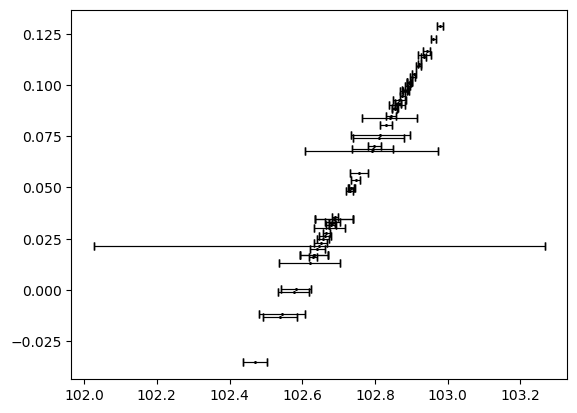

In [22]:
density_cam=0.3217*df['Splitting']-33
density_cam_lower=0.3217*(df['Splitting']+df['Corrected_Splitting_σ_peak_fit'])-33
density_cam_upper=0.3217*(df['Splitting']-df['Corrected_Splitting_σ_peak_fit'])-33
Diff=np.abs(density_cam_lower-density_cam_upper)/2
# plt.plot(df['Splitting'], density_cam, 'ok')
# plt.plot(df['Splitting'], density_cam_lower, '.r')
# plt.plot(df['Splitting'], density_cam_upper, '.c')

plt.errorbar(df['Splitting'], density_cam, xerr=Diff, 
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', capsize=3)

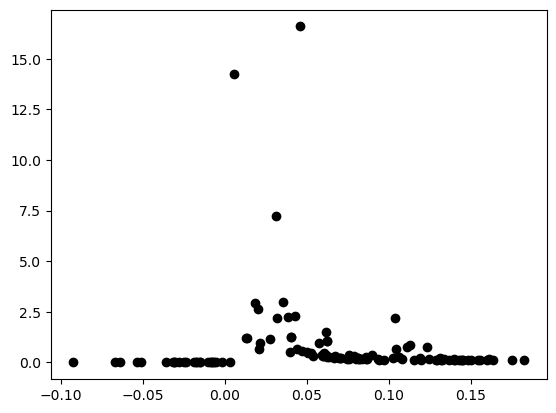

In [16]:
plt.plot(df['Density g/cm3'], df['σ Density g/cm3']/df['Density g/cm3'], 'ok')

In [12]:
# This cell saves the merged together dataframe with the folder name and the date you fitted it
from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight').reset_index(drop=True)
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_July 17, 2023_fitted_2023-07-17.xlsx


## This helps visualize the errors on each spectra 

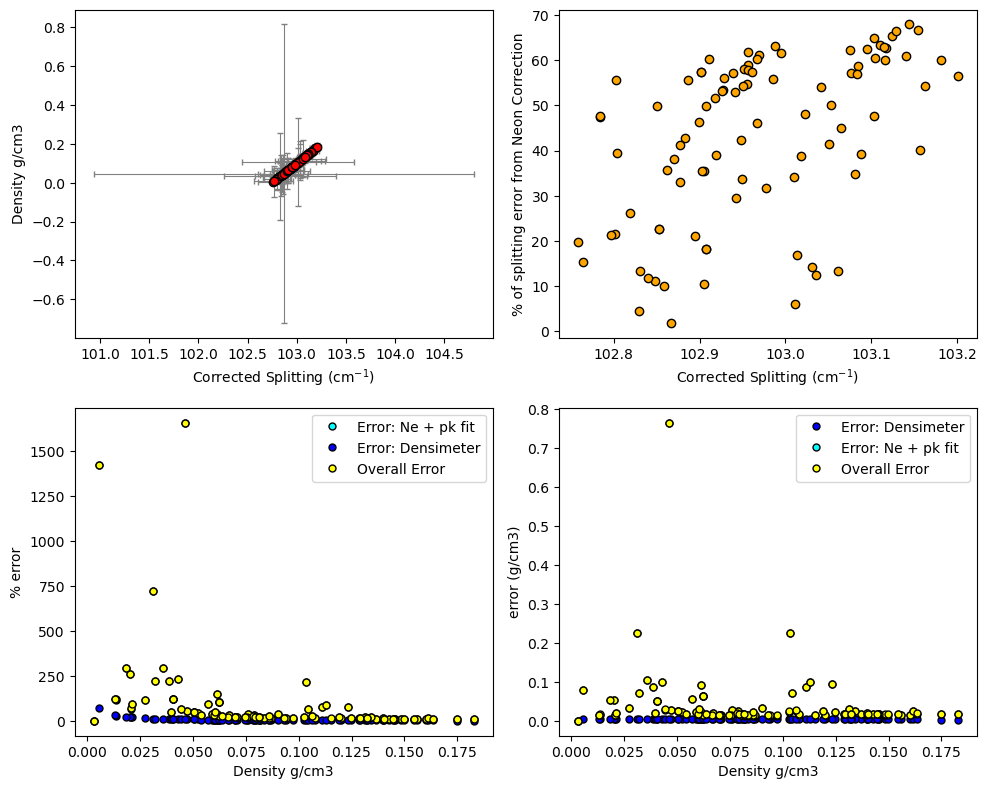

In [13]:
df_plot=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df_plot=df_plot.loc[df_plot['Density g/cm3']>0]
ax1.errorbar(df_plot['Corrected_Splitting'], df_plot['Density g/cm3'],
xerr=df_plot['Corrected_Splitting_σ'], yerr=df_plot['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df_plot['Corrected_Splitting'], 
100*df_plot['Corrected_Splitting_σ_Ne']/(df_plot['Corrected_Splitting_σ_Ne']+df_plot['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df_plot['Density g/cm3'], 100*df_plot['σ Density g/cm3 (from Ne+peakfit)']/df_plot['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df_plot['Density g/cm3'], 100*df_plot['σ Density g/cm3 (from densimeter)']/df_plot['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df_plot['Density g/cm3'], 100*df_plot['σ Density g/cm3']/df_plot['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df_plot['Density g/cm3'], df_plot['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df_plot['Density g/cm3'], df_plot['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')
ax4.plot(df_plot['Density g/cm3'], df_plot['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## IF FIs
- This calculates an estimated pressure of entrapment based on a temperature you have estimated

In [ ]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2700)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan')
ax2.hist(Depth, ec='k', fc='white')
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')